In [34]:
import pandas as pd
import numpy as np
train_data = pd.read_csv('C:/Users/shell/Downloads/train.csv')
test_data = pd.read_csv('C:/Users/shell/Downloads/test.csv')
gender_submission = pd.read_csv('C:/Users/shell/Downloads/gender_submission.csv')

In [16]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
train_data.drop(columns=['Cabin'], inplace=True)

In [17]:
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)

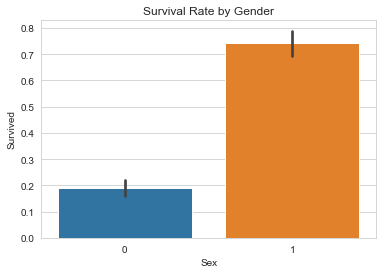

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival Rate by Gender')
plt.show()

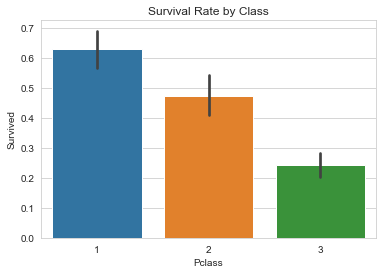

In [19]:
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Class')
plt.show()

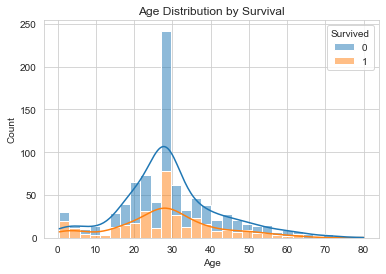

In [20]:
sns.histplot(data=train_data, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title('Age Distribution by Survival')
plt.show()

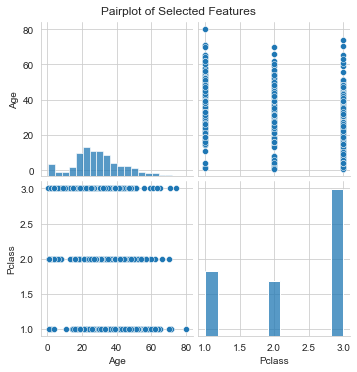

In [65]:
sns.pairplot(train_data[['Sex', 'Age', 'Pclass']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show(block=False)

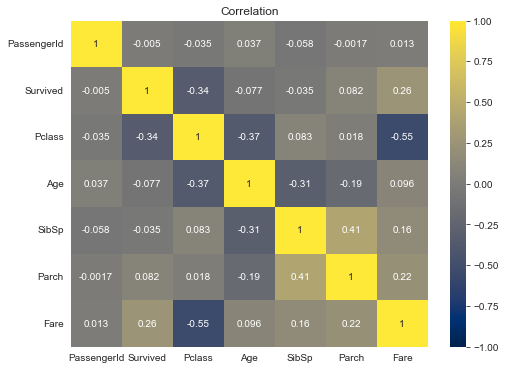

In [62]:
plt.figure(figsize=(8, 6))
numeric_columns = train_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', vmin=-1, vmax=1)
plt.title('Correlation')
plt.show(block=False)